In [1]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from matplotlib import pyplot as plt
import random

In [2]:
minmaxscaler = MinMaxScaler()

This section provides an overview of how satellite image data is collected, processed, and prepared for deep learning-based semantic segmentation.

🔹 Overview
The goal is to understand how to process satellite data and generate masked segmentation images for each image tile. We will also generate corresponding label masks using Python and libraries such as:

NumPy, Matplotlib, Pillow, TensorFlow, Keras, OpenCV, Patchify, Scikit-learn

The focus is on preparing the data in a structured format, suitable for training and testing deep learning models.

🔹 Workflow Summary
Introduction to Satellite Data

Learn how satellite data is collected and structured.

Understand how this data can be used in deep learning models.

Image Segmentation

Understand how to create semantic segmentation labels from the original satellite images.

Use Python tools to build segmentation masks corresponding to each tile image.

Libraries Used

NumPy, Matplotlib, PIL, Keras, TensorFlow, OpenCV, Patchify, etc.

🔹 Output of Part 1
Training-ready datasets consisting of:

Satellite image tiles.

Corresponding mask images (label masks).

This processed data will be used as input for model training in Part 2.

🔹 Foundation of the Data
The foundation of the dataset is derived from satellite maps, which can be collected from:

Google Maps

Mapping APIs

Satellite imagery services

These maps are split and structured into smaller image segments for efficient training.

🔹 Data Structure Breakdown
Satellite map data is divided into three primary components:

1. Tile Image:( one particular tile coming out from the satellite mapping data.(my understanding)
A single segmented tile (or patch) extracted from the larger satellite image.

Represents a specific spatial area in the satellite map.

2. Mask Image 
A labeled version of the tile image.
(Which is the masked image of the given tile and the mask labels are the list of items which you would want to train your deep learning model so that it could predict in your input data when you are applying your model to  figure it out which particular class of items model can predict into given image,  the only thing is you need to provide the training data which is suffient enough so that your model can learn from the input data)

It highlights the regions in the tile corresponding to different classes (e.g., buildings, roads, vegetation).

3. Mask Labels
Represents the class information of each pixel in the mask image.

These labels are used to train the deep learning model, so it can later predict the class of each pixel in unseen satellite imagery.

🔹 Purpose
To build and prepare datasets for semantic segmentation tasks using satellite imagery.

To train deep learning models that can automatically detect and classify regions within satellite images.t2

 given image

In [3]:
dataset_root_folder = r'C:\Users\ramum\Satellite_image_dataset'
dataset_name = 'Semantic segmentation dataset'

image_path = os.path.join(dataset_root_folder, dataset_name, 'Tile 2', 'images', 'image_part_001.jpg')

print("Fixed path:", image_path)
print("File exists:", os.path.exists(image_path))

Fixed path: C:\Users\ramum\Satellite_image_dataset\Semantic segmentation dataset\Tile 2\images\image_part_001.jpg
File exists: True


In [4]:
image_patch_size = 256

In [5]:
#use open cv to read the image
#imread is a method which is going to read, we are going to give path into the
#paranthesis
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 2/images/image_part_001.jpg', 1)


In [6]:
image.shape

(544, 509, 3)

In [7]:
image_patches = patchify(image, (image_patch_size, image_patch_size, 3), step = image_patch_size)

In [8]:
len(image_patches)

2

In [9]:
print(image_patches.shape)

(2, 1, 1, 256, 256, 3)


In [10]:
image_x = image_patches[0,0, :, :]
#MinMaxScaler
#
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [11]:
image_y[0].shape

(256, 256, 3)

In [12]:
print(type(image)) # to convert ndarray to image we need to use PIL lib

<class 'numpy.ndarray'>


In [13]:
type(Image.fromarray(image))

PIL.Image.Image

In [14]:
image

array([[[ 57,  72,  81],
        [ 50,  65,  74],
        [ 72,  84,  94],
        ...,
        [ 77,  85, 115],
        [ 77,  86, 124],
        [ 76,  87, 131]],

       [[ 53,  67,  79],
        [ 60,  75,  84],
        [ 82,  94, 106],
        ...,
        [ 83,  88, 119],
        [ 76,  85, 123],
        [ 69,  80, 124]],

       [[ 67,  78,  92],
        [101, 113, 125],
        [107, 116, 130],
        ...,
        [ 86,  91, 122],
        [ 84,  91, 130],
        [ 79,  88, 132]],

       ...,

       [[111, 107, 102],
        [102,  98,  93],
        [ 85,  81,  76],
        ...,
        [ 97,  91,  96],
        [105, 101, 106],
        [121, 120, 122]],

       [[127, 124, 119],
        [141, 138, 133],
        [135, 133, 125],
        ...,
        [ 99,  93,  98],
        [109, 105, 110],
        [105, 104, 106]],

       [[163, 163, 157],
        [178, 178, 172],
        [159, 157, 149],
        ...,
        [101,  95, 100],
        [111, 107, 112],
        [ 97,  94,  96]]

In [15]:
(image.shape[0]//image_patch_size)*image_patch_size

512

In [16]:

image.shape

(544, 509, 3)

In [17]:
import cv2  # Make sure OpenCV is imported
image_dataset = []
mask_dataset = []
for image_type in ['images' , 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  elif image_type == 'masks':
     image_extension = 'png'
  for tile_id in range(1,8):
    for image_id in range(1,20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {tile_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0, size_x, size_y))
        #print("({},  {})".format(image.size[0],image.size[1]))
        image = np.array(image)
        patched_images = patchify(image, (image_patch_size, image_patch_size, 3), step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print(individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)





In [18]:
#By using MinMax scaler where are putting every pixcel value between 0 and 1

In [19]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [20]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [21]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [22]:
type(np.reshape(image_dataset[0],(image_patch_size,image_patch_size, 3)))

numpy.ndarray

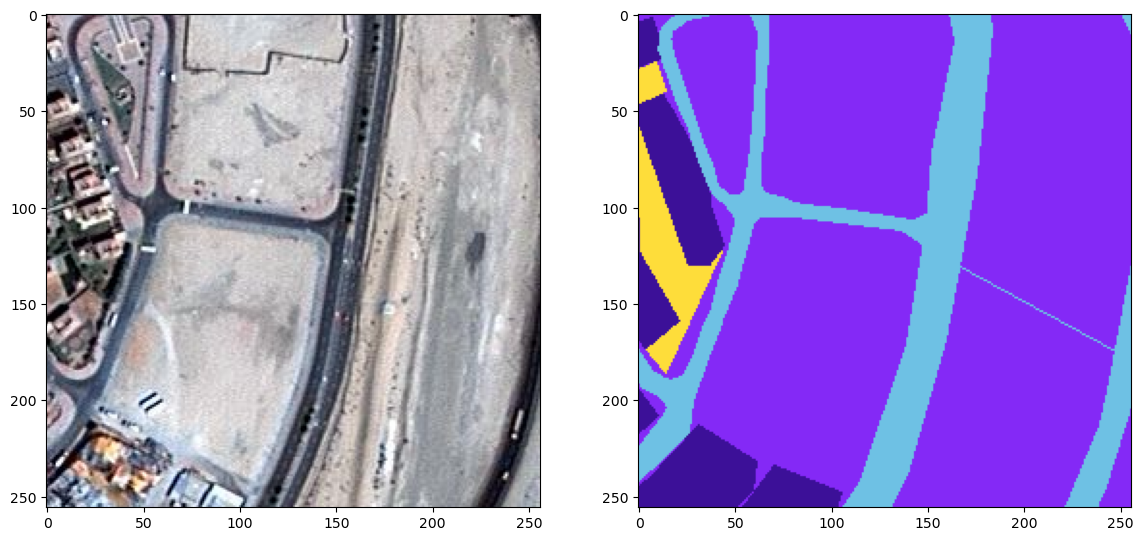

In [23]:
random_image_id = random.randint(0, len(image_dataset))
plt.figure(figsize =(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])


In [24]:
#Processing the labels
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = '#FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [25]:
 #We need to write the method which takes the label
#Defining the RGB to label conversion method
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype=np.uint8)
  label_segment[np.all(label == class_water, axis=-1)] = 0
  label_segment[np.all(label == class_land, axis=-1)] = 1
  label_segment[np.all(label == class_road, axis=-1)] = 2
  label_segment[np.all(label == class_building, axis=-1)] = 3
  label_segment[np.all(label == class_vegetation, axis=-1)] = 4
  label_segment[np.all(label == class_unlabeled, axis=-1)] = 5
  label_segment = label_segment[:,:,0]

  
  return label_segment
  

In [26]:
#Setting up labels
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)



In [27]:
#Setting up the labels array
labels = np.array(labels)

labels = np.expand_dims(labels, axis = 3)
labels
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [28]:
print("Total unique labels based on masks: ", format(np.unique(labels)))

Total unique labels based on masks:  [0 1 2 3 4 5]


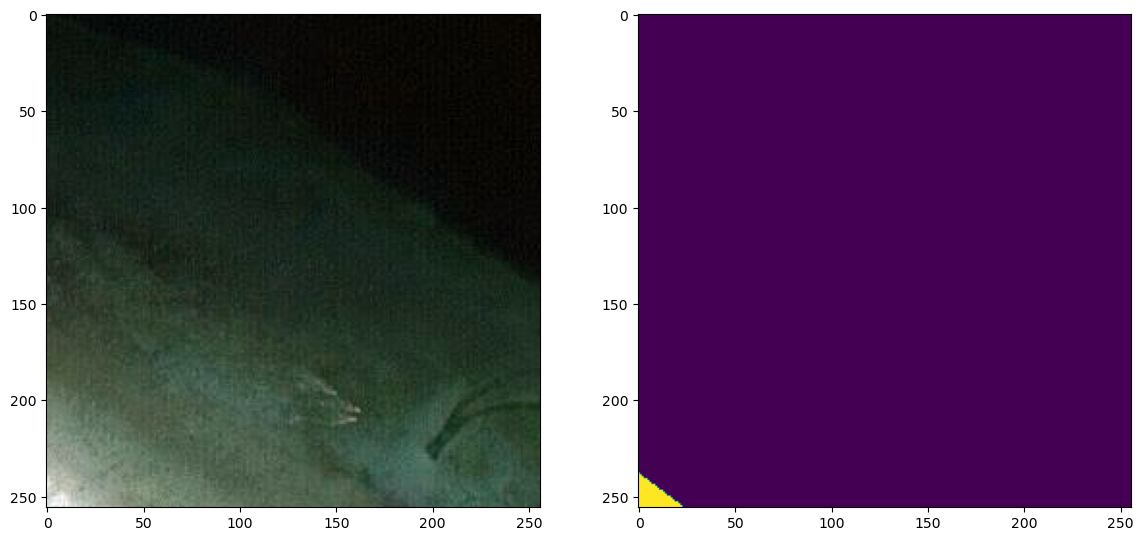

In [29]:
random_image_id = random.randint(0, len(image_dataset))
plt.figure(figsize =(14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#Instead of using the mask dataset we are using the labels dataset to visualize our training images
plt.imshow(labels[random_image_id][:,:,0])


In [30]:
# total number of classes we have 6
total_classes = len(np.unique(labels))
total_classes

6

In [31]:
from tensorflow.keras.utils import to_categorical

In [32]:
labels_categorical_dataset= to_categorical(labels, num_classes= total_classes)
labels_categorical_dataset

array([[[[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        ...,

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         ...,
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0.],
         [0., 1., 0., 0., 0., 0.],
         [0.

In [33]:
labels_categorical_dataset.shape

(945, 256, 256, 6)

In [34]:
master_training_dataset = image_dataset

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
#We are creating training and the test dataset by using the tensorflow and sklearn libraries
X_train, X_test, y_train, y_test = train_test_split(master_training_dataset,labels_categorical_dataset,test_size=0.15, random_state = 100)

In [37]:
#Our training data is ready here is the image, height, width, channels and classes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [38]:
image_height = X_train.shape[1]
image_width =X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = y_train.shape[3]

In [39]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


📘 Part 2: Performing Deep Learning with Satellite Data – Documentation
This section describes the process of training a semantic segmentation model on satellite image data using the U-Net architecture in a Google Colab environment with TensorFlow/Keras. It also covers model evaluation, visualization, and interpretation using activation maps and gradients.

🔹 Overview
In this phase, we move from data preparation to actual deep learning model training. The primary goals are:

Implement the U-Net model for segmentation

Understand and apply key components like encoders, decoders, loss functions, and metrics

Train the model in Google Colab using Jupyter Notebooks

Evaluate the model and interpret results using activation maps and gradients

🔸 1. U-Net Model Architecture
The U-Net is a convolutional neural network architecture specifically designed for image segmentation tasks, making it ideal for satellite imagery.

✳️ U-Net Components:
Encoder (Contracting Path):

Extracts features from input images

Typically uses convolutional + max-pooling layers

Decoder (Expanding Path):

Reconstructs the image using upsampling and transposed convolutions

Helps in restoring spatial resolution

🔸 2. Loss Function & Evaluation Metrics
To train our segmentation model effectively, we need to define appropriate loss functions and metrics:

✅ Loss Functions:
Binary Crossentropy or Categorical Crossentropy (depending on number of classes)

Dice Loss or Jaccard Loss (for overlapping evaluation)

📊 Evaluation Metrics:
IoU (Intersection over Union)

Dice Coefficient

Pixel Accuracy

These metrics help interpret the quality of segmentation output.

🔸 3. Training Process in Google Colab
The full deep learning pipeline is executed in a Jupyter Notebook running on Google Colab, which provides free GPU acceleration.

🔁 Workflow:
Load training and mask data

Preprocess images and masks (resize, normalize)

Define and compile the U-Net model

Train the model using .fit() with callbacks

Save the trained model and export history

🔸 4. Model Evaluation and Serving
After training:

Visualize loss and metric curves (model history)

Evaluate model performance on validation/test data

Use the model to generate predictions on new/unseen tile images

🔸 5. Visualizing Activations and Gradients
To better understand how the model makes decisions, we apply post-training analysis:

🧠 Using tf.keras and custom tools:
Extract activation outputs for specific layers

Visualize feature maps

Compute Grad-CAM or saliency maps to highlight important regions

Analyze how different filters respond to parts of the input image

This interpretability step is critical in trusting AI predictions in geospatial or satellite-based applications.

🧩 Final Output of Part 2:
Trained U-Net model

Training history (loss/metrics over epochs)

Prediction maps for unseen images

Interpretability results (activation maps, gradients)

## Coding part 2

Deep Learning with satellite Imagery Data


In [40]:
from keras.models import Model
#for every deep learning we need to have layers
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda



In [41]:
from keras import backend as K
# why i kept in a single seperate line the reason is  because the keras is high label.
# backend could be anything
#Right now in this example our backend will be tensorflow.
# The backend exactly means at the tensor label calculations. When the tensor label calculations all the
#Deep mathmatics is going to covered by the keras '  
#THe keras is just high level methodlogy where these classes or these methods gives us the skeleton 
#What we want to do. But when it comes to processing the tensors everything goes back to the back end,
#So thats y we are importing back here as K, So we will denote all the backend methods by K.

#But as soon as we are referring to the K you can understand that the calculations goes deep inside the 
#Keras backend which could be what ever we have defined. Right now by default the keras backend is 
# tensorflow however you can change this to even use the other deep learning libraries
#All the backend calculations 

Sure! Here's a clearer and more organized explanation of what you're trying to convey, in a way that improves both readability and understanding:

---

### Understanding Keras and Backend (e.g., TensorFlow)

We often **import the Keras backend as `K`** and refer to it in a separate line, and there's a reason for that — it helps us distinguish between **high-level API logic** and the **low-level tensor computations** handled by the backend.

#### Why Keras is considered high-level:
- **Keras** provides a **user-friendly API** with classes and methods that help define and build neural network architectures quickly and easily.
- It acts as a **"skeleton" or blueprint** for specifying what we want our model to do (like layers, activations, losses, etc.).

#### What is the backend (e.g., TensorFlow)?
- While Keras defines *what* we want to do, the **actual mathematical operations on tensors** (like matrix multiplications, gradients, etc.) are performed by the **backend engine**.
- **TensorFlow** is the default backend in most setups today, but **Keras also supports other backends** like Theano or CNTK (although they are now deprecated or rarely used).
  
#### Why import backend as `K`?
- When we write `import keras.backend as K`, we are:
  - Giving ourselves access to **low-level tensor operations** (e.g., `K.mean()`, `K.sum()`, `K.reshape()`).
  - Indicating that we're using methods that interact directly with the **tensor computations** of the backend engine.
  - It’s a common convention — whenever you see `K.something()`, it’s clear that you’re working at the tensor level and not just using high-level Keras abstractions.

---

### Final Thought:
In short, **Keras = high-level model structure**, while the **backend (TensorFlow) = performs the deep mathematical operations**. We import `keras.backend as K` to bridge that gap and access those low-level functionalities when needed.

Let me know if you'd like a diagram for this or examples of `K` usage!

## Setting up Evaluation Metrics: Jaccard index
We will use a custom eval metrics for this segmentation DL model
Jaccard Index / Intersection over Union (IoU)

IoU = Overlap / Union
This is what we are going to apply on our labels data

In [106]:
#We have to take our training data which we have already created, so we are taking y_true and 
#y_pred that will be our input and we need to use the backend 
#we will take the y_truew and we wil flattern that

# def jaccard_coef(y_true, y_pred):
#     y_true_flattern = K.flattern(y_true)
#     y_pred_flattern = K.flattern(y_pred)
#     intersection = K.sum(y_true_flattern * y_pred_flattern)
#     final_coef_value = intersection  + 1.0/ (K.sum(y_true_flattern) + K.sum() - intersection + 1.0)
#     return final_coef_value

import tensorflow as tf
import tensorflow.keras.backend as K

def jaccard_coef(y_true, y_pred):
    # Flatten both label and prediction tensors
    y_true_flat = tf.reshape(y_true, [-1])
    y_pred_flat = tf.reshape(y_pred, [-1])
    
    # Compute intersection and union
    intersection = K.sum(y_true_flat * y_pred_flat)
    union = K.sum(y_true_flat) + K.sum(y_pred_flat) - intersection

    # Add small epsilon to avoid division by zero
    iou = (intersection + 1e-7) / (union + 1e-7)
    return iou
    
    
    

## U-Net Model Architecture
Coding the U-Net model by using the original Proposed Architecture

## Setting Model Metrics
We will be creating the models as soon as metrics are set


In [107]:
# def multi_unet_model(n_classes, image_height, image_width, image_channels):
#     inputs = Input((image_height, image_width, image_channels))
#     source_input = inputs
#     #Setting up conv2d into particular object
#     cl = Conv2D(16, (3,3), activation ='relu', kernel_initializer = "he_normal", padding = "same" )(source_input)
#     #providing input c1 and output also be c1, The data convolutional layer has this input and after
#     #take that dropout 20% of the data based on c1 or either what ever remaining
#     c1=Dropout(0.2)(c1) # Now we have 80% of the data going fair, So some of these layers have that many 
# #neurons we are dropping so thats the Dropout and If you would want to perform the experimentation
# #that is the palce where you can perform the experimentation by changing this value to a different
# #value because the original network was designed for biomedical images so when we are applying this 
# #network for satellite images on tomorrow you are trying to perform something total different for 
# #example agricultural images crop destruction food detection anything or the disease detection in
# # the trees you could actually take the same network model and try to play with the certain parameters
# # and  see what is going to help us to maximize your IOU or Jacquard coefficient similar to that
# #we are still using this so one more convolutional layer before we are going to Max pool it so take this
#     c1 = conv2D(16, (3,3), activation = "relu",kernel_initializer = "he_normal", padding = "same")(c1)
#     #Once we perform two convolution layer at this point we need to max pool it.
#     p1 = Maxpooling2D((2,2))(c1)
#     #Clearly observe U-net architecture first the filter was 64 64 in the next step it became double 128 128


# #Now we are building second layer. Here p1 that is maxpooling going to be input here. Note convolution is
#     #defined as 3 , 3 so we are not changing that.
#     c2 = Conv2D(32, (3,3), activation ='relu', kernal_initializer = "he_normal", padding = "same" )(p1)
#     c2 = Dropout(0.2)(c2)
#     c2 = Conv2D(32, (3,3), activation ='relu', kernal_initializer = "he_normal", padding = "same" )(c2)
#     p2 = Maxpooling2d((2,2))(c2)

#     c3 = Conv2D(64, (3,3), activation ='relu', kernal_initializer = "he_normal", padding = "same" )(p2)
#     c3 = Dropout(0.2)(c3)
#     c3 = Conv2D(64, (3,3), activation ='relu', kernal_initializer = "he_normal", padding = "same" )(c3)
#     p3 = Maxpooling2d((2,2))(c3)


#     c4 = Conv2D(128, (3,3), activation ='relu', kernal_initializer = "he_normal", padding = "same" )(p3)
#     c4 = Dropout(0.2)(c4)
#     c4 = Conv2D(128, (3,3), activation ='relu', kernal_initializer = "he_normal", padding = "same" )(c4)
#     p4 = Maxpooling2d((2,2))(c4)


#     c5 = Conv2D(256, (3,3), activation ='relu', kernal_initializer = "he_normal", padding = "same" )(p4)
#     c5 = Dropout(0.2)(c5)

#     c5 = Conv2D(256, (3,3), activation ='relu', kernal_initializer = "he_normal", padding = "same" )(c5)

#     # We are doing upsampling thats why we are calling upsampling
#     u6 =Conv2DTranspose(128, (2,2), strides =(2,2), padding = "same")(c5)
#     #the value of u6 is the concatenation with u6 and c4.
#     u6 = concatenate( [u6, c4])

#     c6 = Conv2D(128, (3,3), activation ='relu', kernal_initializer = "he_normal", padding = "same" )(u6)
#     c6 = Dropout(0.2)(c6)
#     c6 = Conv2D(128, (3,3), activation ='relu', kernal_initializer = "he_normal", padding = "same" )(c6)


#     # We are doing upsampling thats why we are calling upsampling
#     u7 =Conv2DTranspose(64, (2,2), strides =(2,2), padding = "same")(c6)
#     #Now we are doing concatenation with u7 and c3
#     u7 = concatenate( [u7, c3])

#     c7 = Conv2D(64, (3,3), activation ='relu', kernal_initializer = "he_normal", padding = "same" )(u7)
#     c7 = Dropout(0.2)(c7)
#     c7 = Conv2D(64, (3,3), activation ='relu', kernal_initializer = "he_normal", padding = "same" )(c7)


#     u8 =Conv2DTranspose(32, (2,2), strides =(2,2), padding = "same")(c7)
#     u8 = concatenate( [u8, c2])
#     c8 = Conv2D(32, (3,3), activation ='relu', kernal_initializer = "he_normal", padding = "same" )(u8)
#     c8 = Dropout(0.2)(c7)
#     c8 = Conv2D(32, (3,3), activation ='relu', kernal_initializer = "he_normal", padding = "same" )(c8)


#     u9 =Conv2DTranspose(16, (2,2), strides =(2,2), padding = "same")(c8)
#      #In concatenation the default axis is -1 , because going further we do not need to perform any
#     #further concatenation so rather than using the default we are going to perform the concatenation on
#     #axises, so we need to set the axis =3, now it is the point where it could generate output layer.
#     #The output layer again is the convolution, it is the output layer of the convolution of the 1 * 1
#     u9 = concatenate( [u9, c1], axis =3)
#     c9 = Conv2D(16, (3,3), activation ='relu', kernal_initializer = "he_normal", padding = "same" )(u9)
#     c9 = Dropout(0.2)(c7)
#     c9 = Conv2D(16, (3,3), activation ='relu', kernal_initializer = "he_normal", padding = "same" )(c9)
#     #We are using activation function as a softmax, why softmax? For the classification task the 
#     #softmax is the best 
#     outputs = Conv2D(n_classes, (1,1), activaction = "softmax")(c9)

#     #defining our model
#     model = Model(inputs = [inputs], outputs = [outputs])
#     return model
    
     

Here is a summary extracted from all the **comments** in your `multi_unet_model` code:

---

### 🔍 **Extracted Comment Text**

1. Setting up Conv2D into a particular object.
2. Providing input `c1` and output also as `c1`. The data convolutional layer has this input.
3. Apply dropout of 20% based on `c1`. Now we have 80% of the data going through.
4. Dropout drops some neurons. This can be experimented with by changing the dropout rate.
5. Original network was designed for biomedical images. If using it for satellite, agricultural, crop destruction, food or disease detection in trees, you can experiment with parameters.
6. Play with parameters to improve IOU or Jaccard coefficient.
7. Another convolutional layer before max pooling is applied.
8. After two convolution layers, we apply max pooling.
9. In U-Net architecture, the number of filters doubles at each step.
10. Second layer is built using `p1` as input. Kernel size remains 3x3.
11. Upsampling is done using `Conv2DTranspose`.
12. Concatenation of the upsampled result with corresponding encoder block output.
13. Default axis for concatenation is -1, but here axis = 3 is explicitly used.
14. The final output layer is a 1x1 convolution.
15. Activation function used is softmax because it's best for classification tasks.

---

### 🧾 **Summary of the Commented Explanation**

The code builds a **U-Net architecture** for image segmentation tasks. It begins with a series of convolutional layers that extract features (encoder), followed by **dropout** to reduce overfitting and **max pooling** to downsample. The architecture is designed for **biomedical images**, but can be adapted for other types like **satellite or agricultural** imagery by adjusting hyperparameters such as dropout rate.

The **decoder** part reconstructs the image using **upsampling** via `Conv2DTranspose` and **skip connections** using `concatenate`, which help retain spatial information lost during downsampling. Each decoder stage mirrors the encoder's structure. A final 1x1 convolution maps features to class probabilities using the **softmax** function, suitable for multi-class segmentation.



In [108]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Conv2DTranspose, concatenate
from tensorflow.keras.models import Model

def multi_unet_model(n_classes, image_height, image_width, image_channels):
    inputs = Input((image_height, image_width, image_channels))
    
    # Encoder
    c1 = Conv2D(16, (3,3), activation='relu', kernel_initializer="he_normal", padding="same")(inputs)
    c1 = Dropout(0.2)(c1)
    c1 = Conv2D(16, (3,3), activation='relu', kernel_initializer="he_normal", padding="same")(c1)
    p1 = MaxPooling2D((2,2))(c1)

    c2 = Conv2D(32, (3,3), activation='relu', kernel_initializer="he_normal", padding="same")(p1)
    c2 = Dropout(0.2)(c2)
    c2 = Conv2D(32, (3,3), activation='relu', kernel_initializer="he_normal", padding="same")(c2)
    p2 = MaxPooling2D((2,2))(c2)

    c3 = Conv2D(64, (3,3), activation='relu', kernel_initializer="he_normal", padding="same")(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3,3), activation='relu', kernel_initializer="he_normal", padding="same")(c3)
    p3 = MaxPooling2D((2,2))(c3)

    c4 = Conv2D(128, (3,3), activation='relu', kernel_initializer="he_normal", padding="same")(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3,3), activation='relu', kernel_initializer="he_normal", padding="same")(c4)
    p4 = MaxPooling2D((2,2))(c4)

    # Bottleneck
    c5 = Conv2D(256, (3,3), activation='relu', kernel_initializer="he_normal", padding="same")(p4)
    c5 = Dropout(0.2)(c5)
    c5 = Conv2D(256, (3,3), activation='relu', kernel_initializer="he_normal", padding="same")(c5)

    # Decoder
    u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3,3), activation='relu', kernel_initializer="he_normal", padding="same")(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3,3), activation='relu', kernel_initializer="he_normal", padding="same")(c6)

    u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3,3), activation='relu', kernel_initializer="he_normal", padding="same")(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3,3), activation='relu', kernel_initializer="he_normal", padding="same")(c7)

    u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3,3), activation='relu', kernel_initializer="he_normal", padding="same")(u8)
    c8 = Dropout(0.2)(c8)
    c8 = Conv2D(32, (3,3), activation='relu', kernel_initializer="he_normal", padding="same")(c8)

    u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3,3), activation='relu', kernel_initializer="he_normal", padding="same")(u9)
    c9 = Dropout(0.2)(c9)
    c9 = Conv2D(16, (3,3), activation='relu', kernel_initializer="he_normal", padding="same")(c9)

    # Output layer
    outputs = Conv2D(n_classes, (1,1), activation='softmax')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    return model


In [109]:
metrics = ["accuracy", jaccard_coef] #These are our metrics

In [110]:
def get_deep_learning_model():
    return multi_unet_model(n_classes=total_classes, image_height=image_height,
                            image_width=image_width, image_channels=image_channels)
    
    

In [111]:
model = get_deep_learning_model()

In [112]:
#model.get_config()

## Loss Function: Focal Loss(Cross Entropy Loss Extension)

Equal class weights => Dice Loss => Focal Loss => Total Loss    which is (Dice Loss + (1 * Focal Loss))
Focal loss is categorical

Why we need it?
Ans: In Some of the images there might be a very small spot of a certain class. The class become the minority class. Because
it might have the very less impressions aganist other classes.Because you might try to use the satellite data you might find the one particular class somewhere for that reason using total loss function  based on cross entropy loss going to give you the higher chance to detect the particular class thats why we are giving equal weights for every class no matter what the class distribution is. In mAsk data every class will starts with the equal class weight. 



## Generating Loss Function

In [113]:
weights = [0.166, 0.166, 0.166, 0.166, 0.166, 0.166]  # we have six classes so we are defining our weights 6 times

In [114]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
import segmentation_models as sm

In [115]:
#dice_loss = sm.losses.DiceLoss(weights)
dice_loss = sm.losses.DiceLoss(class_weights=weights)

In [116]:
focal_loss = sm.losses.CategoricalFocalLoss()

In [117]:
total_loss = dice_loss +(1 *focal_loss)

## Model Compilation

In [118]:
import tensorflow as tf

In [119]:
# tf.keras.backend.clear_session()
import logging
tf.get_logger().setLevel(logging.ERROR)
tf.keras.backend.clear_session()

In [120]:
model.compile(optimizer = "adam", loss = total_loss, metrics = metrics)

In [121]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 256, 256, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 256, 256, 16)      │             448 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 256, 256, 16)      │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 256, 256, 16)      │           2,320 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 128, 128, 16)      │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 128, 128, 32)      │           4,640 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 128, 128, 32)      │               0 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 128, 128, 32)      │           9,248 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 64, 64, 32)        │               0 │ conv2d_3[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_4 (Conv2D)             │ (None, 64, 64, 64)        │          18,496 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 64, 64, 64)        │               0 │ conv2d_4[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_5 (Conv2D)             │ (None, 64, 64, 64)        │          36,928 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 32, 32, 64)        │               0 │ conv2d_5[0][0]             │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_6 (Conv2D)             │ (None, 32, 32, 128)       │          73,856 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 32, 32, 128)       │               0 │ conv2d_6[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_7 (Conv2D)             │ (None, 32, 32, 128)       │         147,584 │ dropout_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 1,941,190 (7.41 MB)

 Trainable params: 1,941,190 (7.41 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

After Model compilation, we can start the Model training process

In [134]:
model_history = model.fit(X_train, y_train, batch_size = 16, verbose = 1, epochs = 100, validation_data = (X_test,y_test),
                         shuffle = False)


Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - accuracy: 0.8126 - jaccard_coef: 0.6193 - loss: 0.9298 - val_accuracy: 0.7477 - val_jaccard_coef: 0.5545 - val_loss: 0.9549
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.8193 - jaccard_coef: 0.6306 - loss: 0.9279 - val_accuracy: 0.7799 - val_jaccard_coef: 0.5937 - val_loss: 0.9446
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 168s 3s/step - accuracy: 0.8256 - jaccard_coef: 0.6431 - loss: 0.9252 - val_accuracy: 0.7699 - val_jaccard_coef: 0.5872 - val_loss: 0.9492
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.8293 - jaccard_coef: 0.6510 - loss: 0.9239 - val_accuracy: 0.7566 - val_jaccard_coef: 0.5652 - val_loss: 0.9553
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.8288 - jaccard_coef: 0.6469 - loss: 0.9240 - val_accuracy: 0.7746 - val_jaccard_coef: 0.5855 - val_loss: 0.9414
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 171s 3s/step - accuracy: 0.8345 - jaccard_coef: 0.6587 - loss: 0.9214 -

In [137]:
history_a = model_history

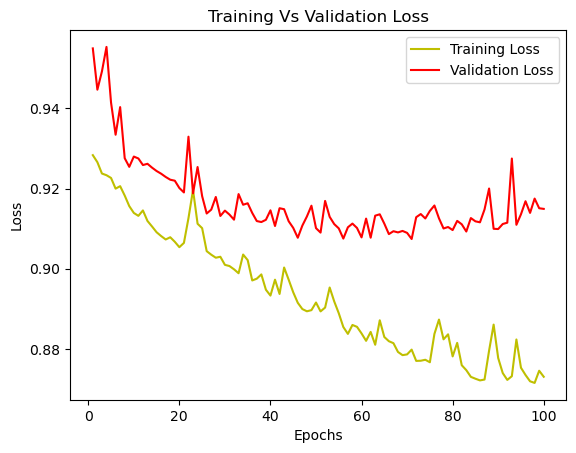

In [138]:
loss = history_a.history["loss"]
val_loss= history_a.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label ="Training Loss")
plt.plot(epochs, val_loss, 'r', label = "Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
# here we need to go from higher to lower that is 1 to 0

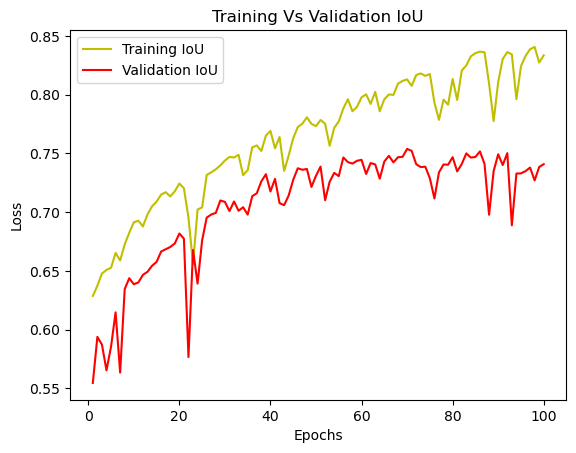

In [139]:
jaccard_coef = history_a.history["jaccard_coef"]
val_jaccard_coef= history_a.history["val_jaccard_coef"]
epochs = range(1, len(jaccard_coef) + 1)
plt.plot(epochs, jaccard_coef, 'y', label ="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label = "Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()
#Here we need to go from 0 to 1

In [140]:
model_history.params  
#For processing of 803 images , based on 16 batch size total 51 steps was taken in each epoch

{'verbose': 1, 'epochs': 100, 'steps': 51}

## Performing Predictions

Now we can generate prediction for the full test data or single test image

In [141]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step


In [143]:
len(y_pred) # We have 142 test images , so the predictions happens on 142 test images

142

In [146]:
y_pred_argmax= np.argmax(y_pred, axis =3)

In [147]:
len(y_pred_argmax)

142

In [148]:
y_pred_argmax

array([[[1, 1, 1, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 3],
        [1, 1, 1, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 2, ..., 1, 1, 1],
        [1, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2],
        [2, 2, 2, ..., 2, 2, 2]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [149]:
y_test_argmax= np.argmax(y_test, axis =3)

In [150]:
y_test_argmax

array([[[3, 3, 3, ..., 1, 1, 1],
        [3, 3, 3, ..., 3, 3, 3],
        [3, 3, 3, ..., 3, 3, 3],
        ...,
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1],
        [0, 0, 0, ..., 1, 1, 1]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        [2, 2, 2, ..., 1, 1, 1],
        ...,
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 2, ..., 0, 0, 0],
        [2, 2, 1, ..., 0, 0, 0]],

       ...,

       [[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0],
        [1, 1, 1, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [169]:
#Comparing masked test image and masked predicted image and see how the results are genrated
test_image_number = random.randint(0,len(X_test))
test_image = X_test[test_image_number]
ground_truth_image =y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis = 3)
predicted_image= predicted_image[0,:,:]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


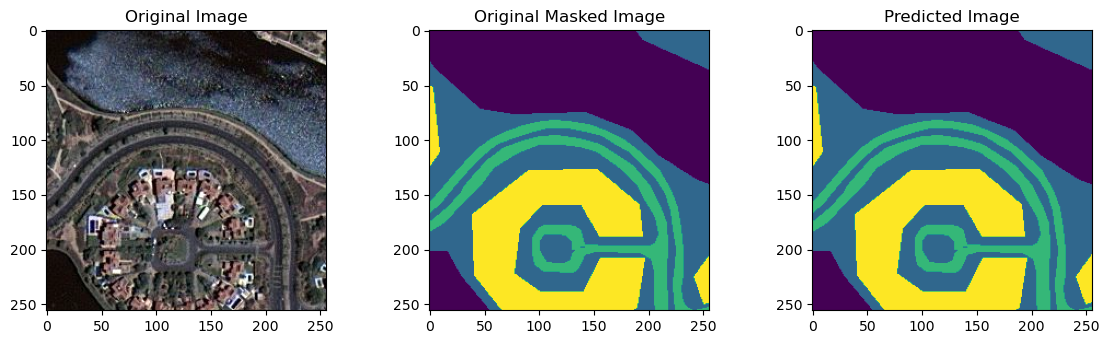

In [170]:
plt.figure(figsize = (14, 8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked Image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(ground_truth_image)

## Saving/Exporting Model to Disk
After Model is verified for optimum performance, it is exported for scoring

In [173]:
#import os
print("Current working directory:", os.getcwd())

Current working directory: C:\Users\ramum


In [175]:
model.save('satellite_segmentation_full.keras')